# Predicting a Pulsar Star

In [1]:
#load the necessary modules
import pandas as pd
import numpy as np
# from scipy.io import loadmat
# import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import datetime
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = '../ten-datasets/'

#load the dataset into a dataframe
df = pd.read_csv(path + 'pulsar_stars.csv')

In [3]:
print(df.shape)
df.head()

(17898, 9)


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
df.target_class.unique()

array([0, 1])

In [5]:
print(df.target_class.shape)

(17898,)


In [6]:
y = df.iloc[:,-1]
X = df.iloc[:,0:-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 0, stratify=y)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14318, 8)
(14318,)
(3580, 8)
(3580,)


In [8]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

In [9]:
X_train.shape

(14318, 8)

## Using GaussianNB and SVM to create new feature

In [10]:
def extend_dim(X,y_predict):
    X_list = X.tolist()
    for i in range(len(X_list)):
        X_list[i].append(y_train_predict[i])
    return np.array(X_list)
    

###  GaussianNB

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
# %%time
y_train_predict = nb.predict(X_train)
y_test_predict = nb.predict(X_test)

In [14]:
new_X_train = extend_dim(X_train,y_train_predict)
new_X_train.shape

(14318, 9)

In [15]:
new_X_test = extend_dim(X_test,y_test_predict)
new_X_test.shape

(3580, 9)

### SVM

In [16]:
from sklearn import svm

In [17]:
# model_svm = svm.SVC(decision_function_shape='ovo')
# model_svm.fit(X_train, y_train)

In [18]:
# y_train_predict = model_svm.predict(X_train)
# y_test_predict = model_svm.predict(X_test)

In [19]:
# new_X_train = extend_dim(new_X_train,y_train_predict)
# new_X_train.shape

In [20]:
# new_X_test = extend_dim(new_X_test,y_test_predict)
# new_X_test.shape

# deep learning
> #### MLP 

> #### CNN

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten,MaxPooling1D,Input
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.utils.vis_utils import plot_model
 

Using TensorFlow backend.


## MLP



In [22]:
new_X_train.shape[1]

9

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 2,473
Trainable params: 2,473
Non-trainable params: 0
_________________________________________________________________


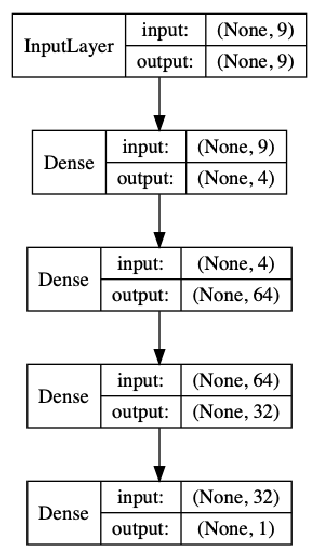

In [23]:
ann_model = Sequential()

ann_model.add(Dense(
        units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = new_X_train.shape[1]))

ann_model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))

ann_model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))


ann_model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann_model.summary()

image_name = 'plusarStars_ann_model.png'
plot_model(ann_model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
plt.figure(figsize=(10,10))
img = plt.imread(image_name)
plt.imshow(img)
plt.axis('off')
plt.show()

In [24]:

hist = ann_model.fit(new_X_train, y_train,
                    batch_size=64,
                    epochs=5,
                    verbose=1,
                    validation_data=(new_X_test, y_test))

score = ann_model.evaluate(new_X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 14318 samples, validate on 3580 samples
Epoch 1/5
14318/14318 [==============================] - 1s 52us/step - loss: 0.2848 - accuracy: 0.9540 - val_loss: 0.0809 - val_accuracy: 0.9774
Epoch 2/5
14318/14318 [==============================] - 0s 32us/step - loss: 0.0796 - accuracy: 0.9774 - val_loss: 0.0757 - val_accuracy: 0.9788
Epoch 3/5
14318/14318 [==============================] - 0s 34us/step - loss: 0.0763 - accuracy: 0.9775 - val_loss: 0.0738 - val_accuracy: 0.9791
Epoch 4/5
14318/14318 [==============================] - 0s 30us/step - loss: 0.0742 - accuracy: 0.9783 - val_loss: 0.0710 - val_accuracy: 0.9793
Epoch 5/5
14318/14318 [==============================] - 0s 31us/step - loss: 0.0729 - accuracy: 0.9781 - val_loss: 0.0701 - val_accuracy: 0.9799
Test loss: 0.07013269433512367
Test accuracy: 0.9798882603645325


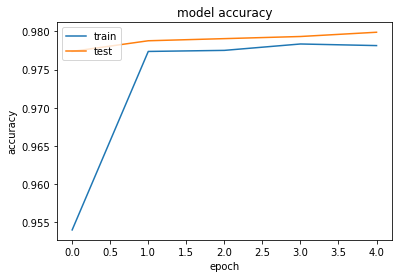

In [25]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

image_name = 'plusarStars_ann_accuracy.png'
plt.savefig(image_name)

plt.show()

## CNN

In [26]:
from keras.models import Sequential
from keras.layers import Input, Conv1D, Conv2D, BatchNormalization, Activation, MaxPooling1D, MaxPooling2D, Dropout, Flatten, Dense

In [27]:
X_train_resh = new_X_train[:, :, np.newaxis]
X_test_resh = new_X_test[:, :, np.newaxis]
print(X_train_resh.shape)
print(y_train.shape)

print(X_test_resh.shape)
print(y_test.shape)

(14318, 9, 1)
(14318,)
(3580, 9, 1)
(3580,)


In [28]:
X_train_resh[0]

array([[-0.63397712],
       [-0.9819066 ],
       [-0.03306956],
       [-0.07815054],
       [-0.37014816],
       [-0.63049162],
       [ 0.7005112 ],
       [ 0.48032751],
       [ 0.        ]])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 9, 16)             64        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 16)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 16)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4, 32)             1568      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 32)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

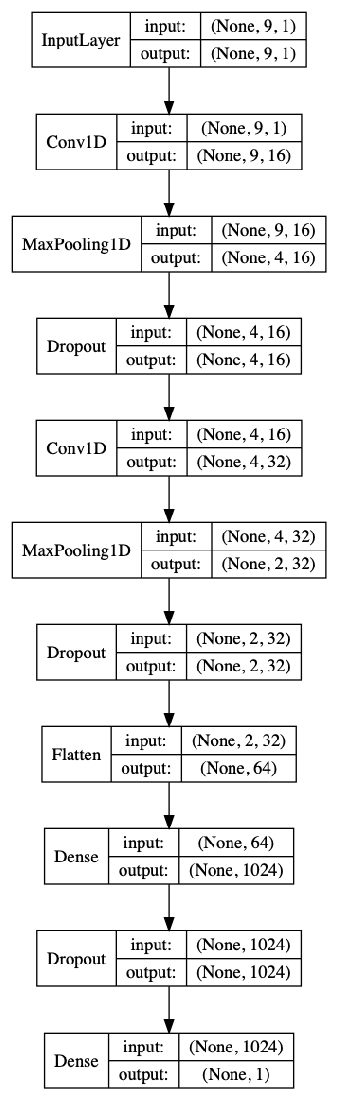

In [29]:
#bn_axis = 3

cnn_model = Sequential()

cnn_model.add(Conv1D(filters = 16, kernel_size = 3, activation='tanh', input_shape=X_train_resh.shape[1:],padding = 'same', strides=1))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv1D(filters = 32, kernel_size = 3,padding = 'same',activation='tanh',))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(1024, activation='tanh'))
cnn_model.add(Dropout(0.25))
        
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])          

cnn_model.summary()

image_name = 'plusarStars_cnn_model.png'
plot_model(cnn_model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
plt.figure(figsize=(20,20))
img = plt.imread(image_name)
plt.imshow(img)
plt.axis('off')
plt.show()

In [30]:
X_test_resh.shape

(3580, 9, 1)

In [31]:
hist = cnn_model.fit(X_train_resh, y_train,
                    batch_size=64,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test_resh, y_test)
                    )

score = cnn_model.evaluate(X_test_resh, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 14318 samples, validate on 3580 samples
Epoch 1/10
14318/14318 [==============================] - 1s 95us/step - loss: 0.1127 - accuracy: 0.9668 - val_loss: 0.0747 - val_accuracy: 0.9791
Epoch 2/10
14318/14318 [==============================] - 1s 67us/step - loss: 0.0871 - accuracy: 0.9753 - val_loss: 0.0737 - val_accuracy: 0.9796
Epoch 3/10
14318/14318 [==============================] - 1s 70us/step - loss: 0.0851 - accuracy: 0.9763 - val_loss: 0.0745 - val_accuracy: 0.9804
Epoch 4/10
14318/14318 [==============================] - 1s 72us/step - loss: 0.0834 - accuracy: 0.9774 - val_loss: 0.0739 - val_accuracy: 0.9785
Epoch 5/10
14318/14318 [==============================] - 1s 74us/step - loss: 0.0822 - accuracy: 0.9768 - val_loss: 0.0780 - val_accuracy: 0.9793
Epoch 6/10
14318/14318 [==============================] - 1s 74us/step - loss: 0.0815 - accuracy: 0.9782 - val_loss: 0.0700 - val_accuracy: 0.9804
Epoch 7/10
14318/14318 [==============================] - 1s 70us/ste

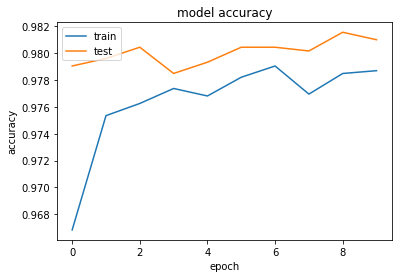

In [32]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()